In [1]:
from utils.binaries import *
from utils.plotting import *

12:33:39 (  +673ms) [INFO   ] -- import logging
12:33:40 (  +160ms) [INFO   ] -- import numpy as np
12:33:40 (    +7ms) [INFO   ] -- import uncertainties
12:33:40 (  +422ms) [INFO   ] -- import pandas as pd
12:33:40 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
12:33:40 (    +2ms) [INFO   ] -- import binaries.tools as tools
12:33:40 (  +323ms) [INFO   ] -- import matplotlib.pyplot as plt
12:33:41 (  +495ms) [INFO   ] -- import seaborn as so
12:33:41 (    +2ms) [INFO   ] -- import plotting.tools as plot
12:33:41 (   +10ms) [DEBUG  ] -- font size set to 9.5
12:33:41 (    +1ms) [DEBUG  ] -- label size set to 13.0
12:33:41 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
12:33:41 (    +1ms) [DEBUG  ] -- markersize set to 2.0
12:33:41 (    +0ms) [DEBUG  ] -- usetex set to False


Text(0.5, 0, 'FPGA timestamp / s')

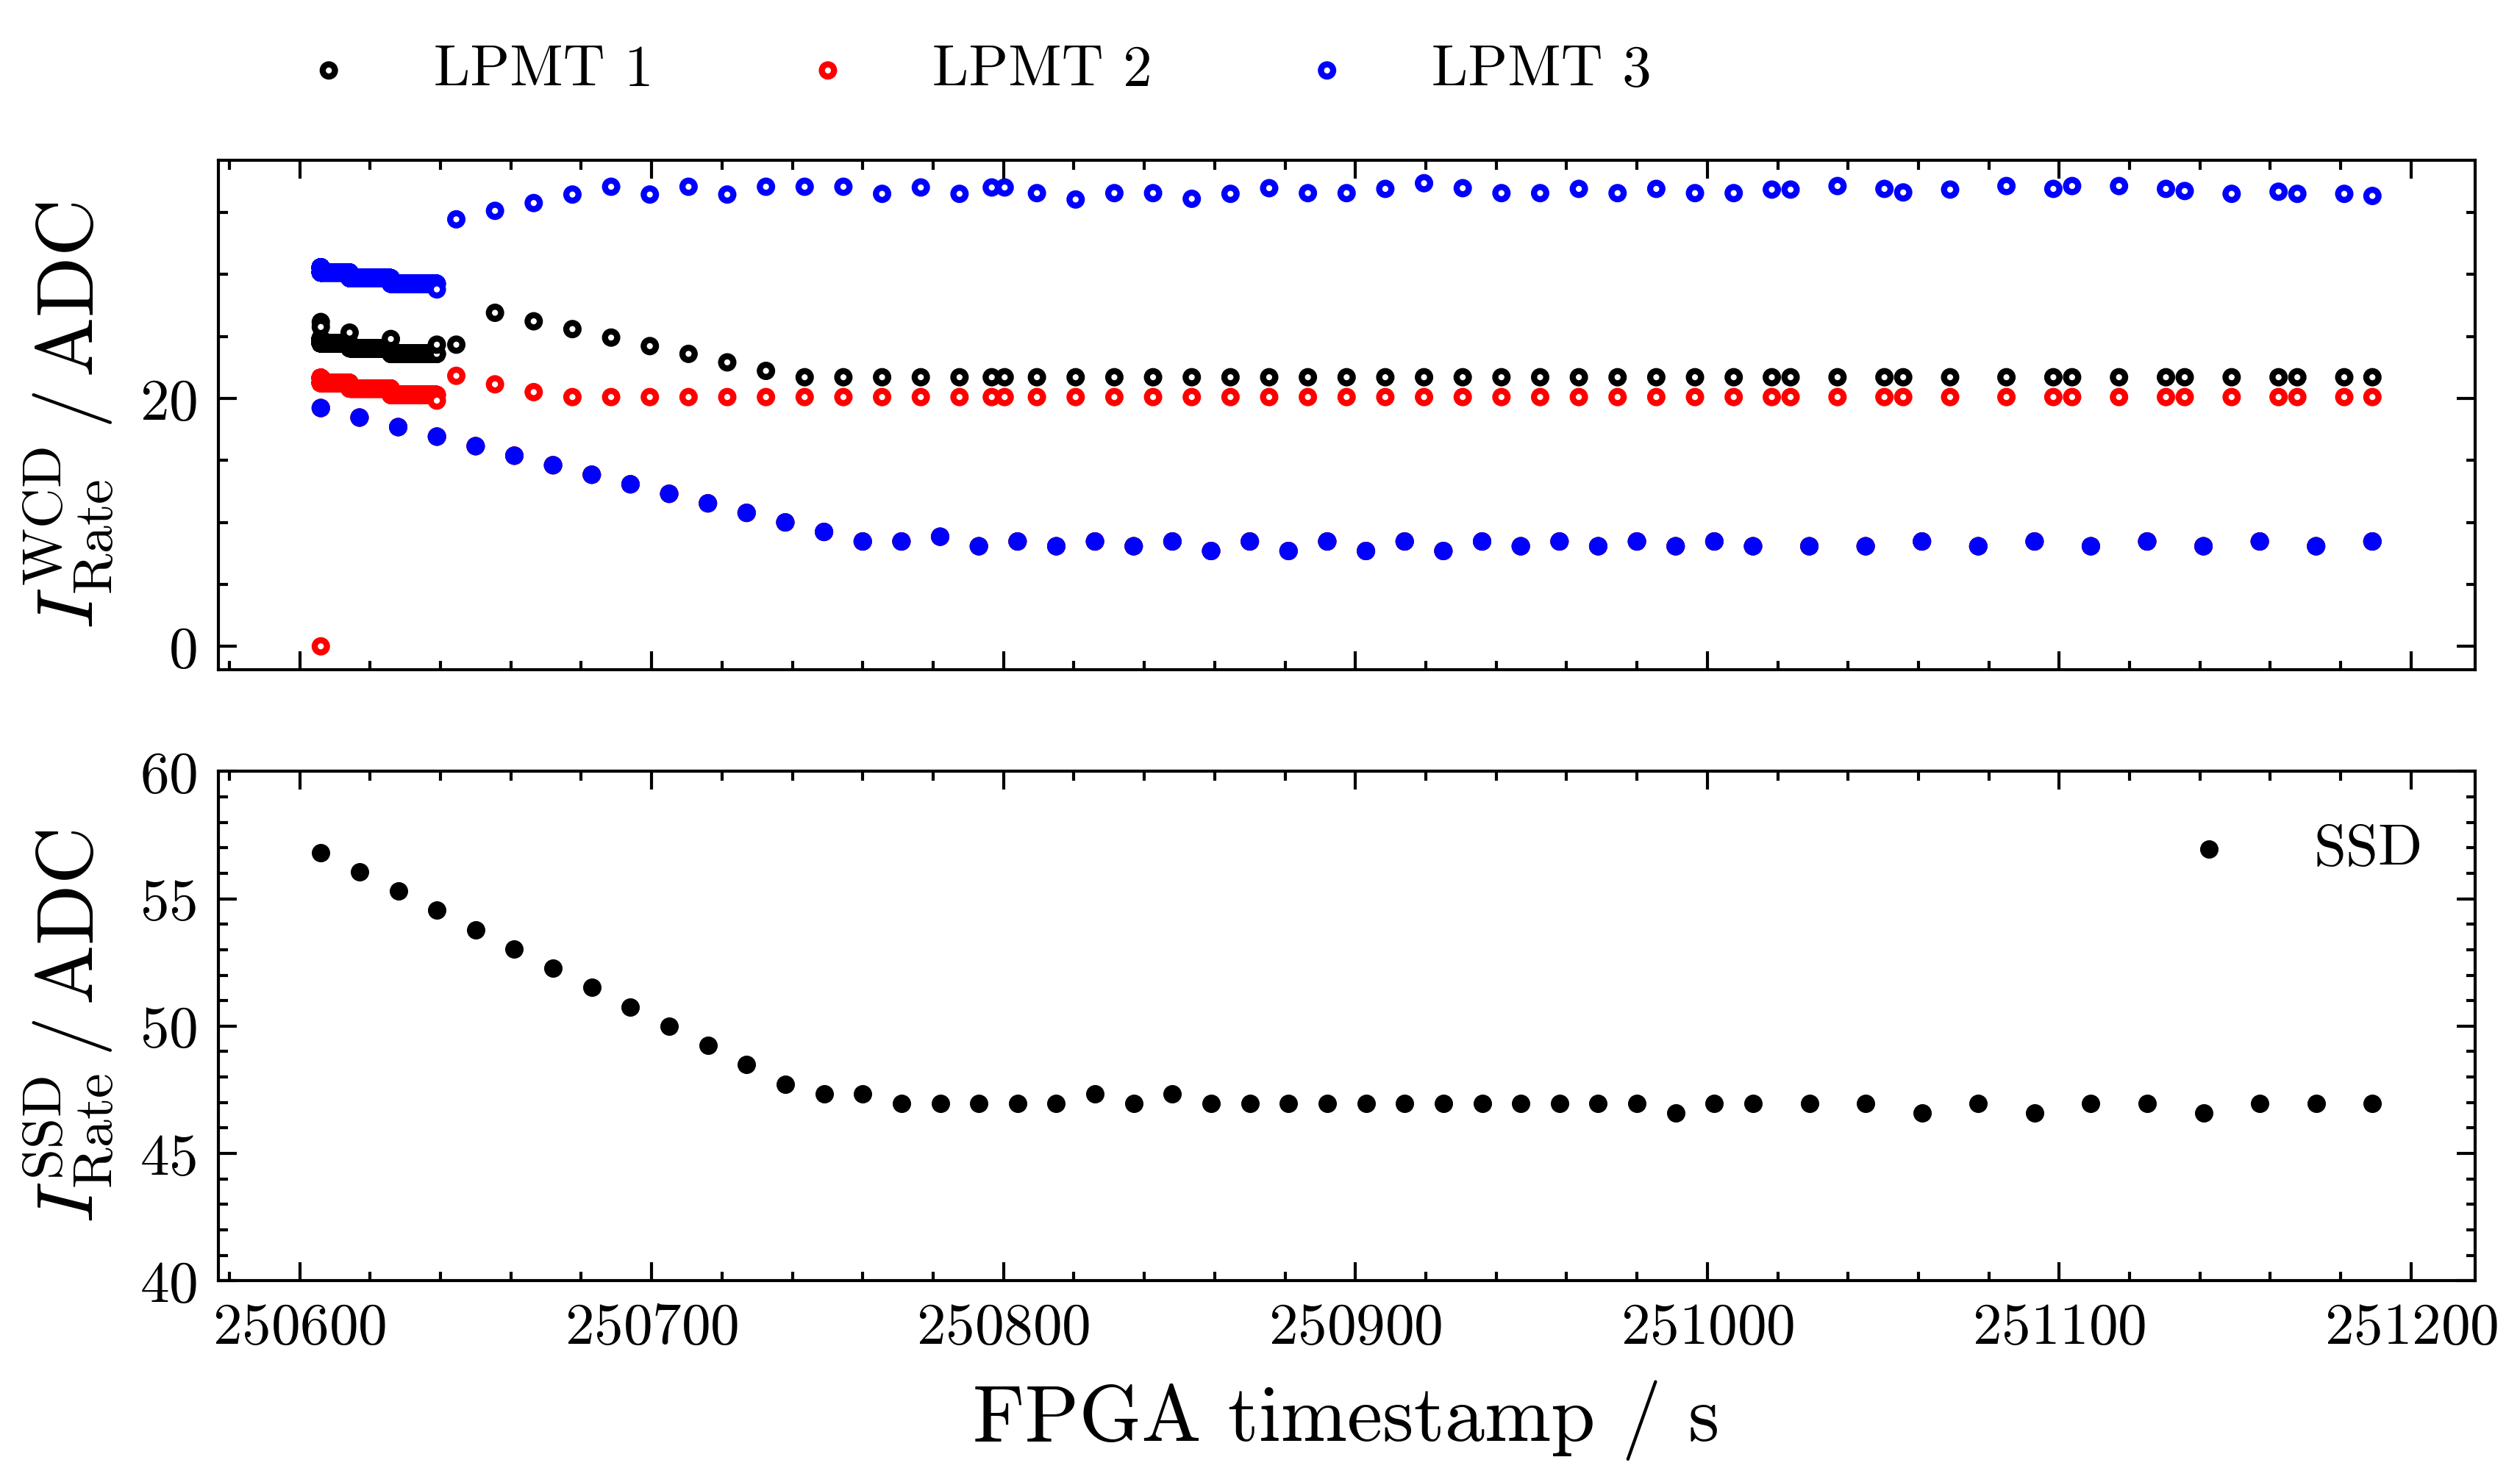

In [29]:
t, wcd1, wcd2, wcd3, ssd = np.loadtxt('/cr/data01/filip/Data/daqIntegrationTests/v2/calib.test', unpack=True)

nan_mask = np.isnan(t)
fck = ["w" if x else "k" for x in nan_mask]
fcr = ["w" if x else "r" for x in nan_mask]
fcb = ["w" if x else "b" for x in nan_mask]
t[nan_mask] = np.interp(np.flatnonzero(nan_mask), np.flatnonzero(~nan_mask), t[~nan_mask])
wcd1[nan_mask] /= 1.75 * 10
wcd2[nan_mask] /= 1.75 * 10
wcd3[nan_mask] /= 1.75 * 10

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.scatter(t, wcd1, fc=fck, ec='k', label="LPMT 1")
ax1.scatter(t, wcd2, fc=fcr, ec='r', label="LPMT 2")
ax1.scatter(t, wcd3, fc=fcb, ec='b', label="LPMT 3")
ax2.scatter(t, ssd, label="SSD")
ax2.legend()

ax2.set_ylim(40, 60)
ax1.legend(bbox_to_anchor=(0, 1.02,1,0.2), loc="lower left", ncol=3)
ax1.set_ylabel("$I^\mathrm{WCD}_\mathrm{Rate}\,/\,\mathrm{ADC}$")
ax2.set_ylabel("$I^\mathrm{SSD}_\mathrm{Rate}\,/\,\mathrm{ADC}$")
ax2.set_xlabel("FPGA timestamp / s")